## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Problem Statement**




---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [27]:


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# loading data into a pandas dataframe
data = pd.read_csv("marketing_campaign (2).csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [29]:
# Write your code here.
#Datatypes of the dataset
data.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


##### **Observations:**

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [30]:
# Write your code here
#Statistical summary
data.describe(include="all")

#data['Income'].mean()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [31]:
#Average Income of household
data['Income'].mean()

np.float64(52247.25135379061)

##### **Observations:**

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [32]:
# Write your code here
#Missing values in the dataset
missing_data=data.isnull().sum()
missing_data[missing_data>0]

,0
Income,24


##### **Observations:**

#### **Question 4**: Are there any duplicates in the data?

In [34]:
# Write your code here
#Duplicates in the dataset
duplicate_data=data.duplicated().sum()
duplicate_data

np.int64(0)

##### **Observations:**

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

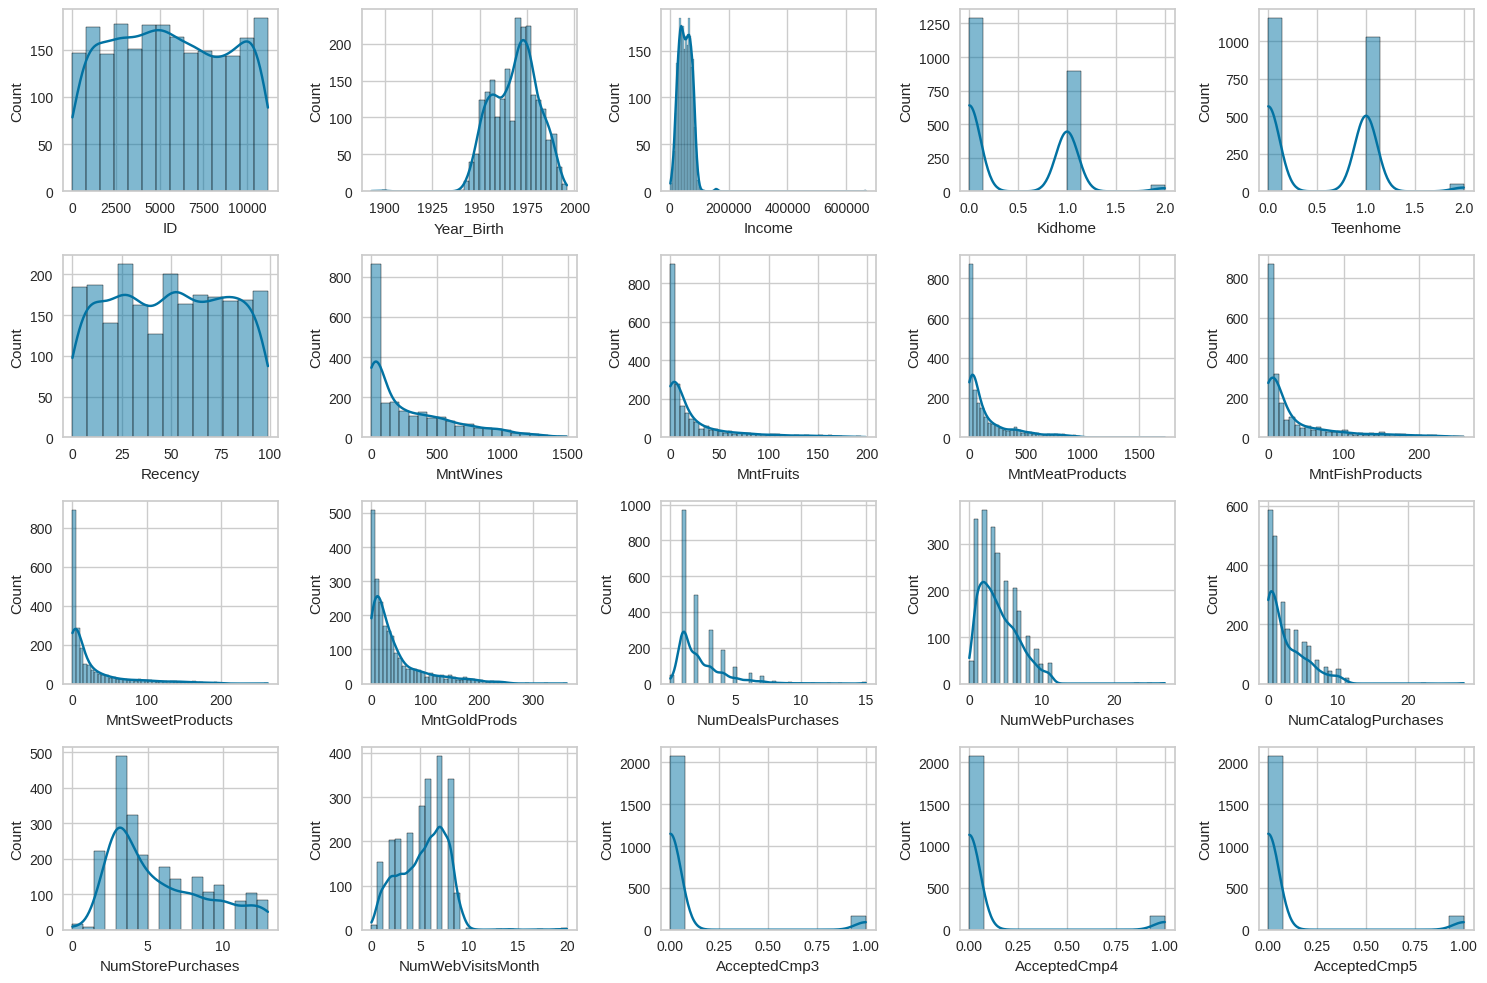

In [35]:
#Performance and observations for Univariate and bivariate analysis
#(variable distributions, interactions between variables) to understand the relationships in data
plt.figure(figsize=(15, 10))
df_numeric = data.select_dtypes(include=['int64', 'float64'])
max_plots = 20
for i, col in enumerate(df_numeric.columns[:max_plots], 1):
    plt.subplot(4, 5, i)
    sns.histplot(data=data,x=col,kde=True)
plt.tight_layout()
plt.show()




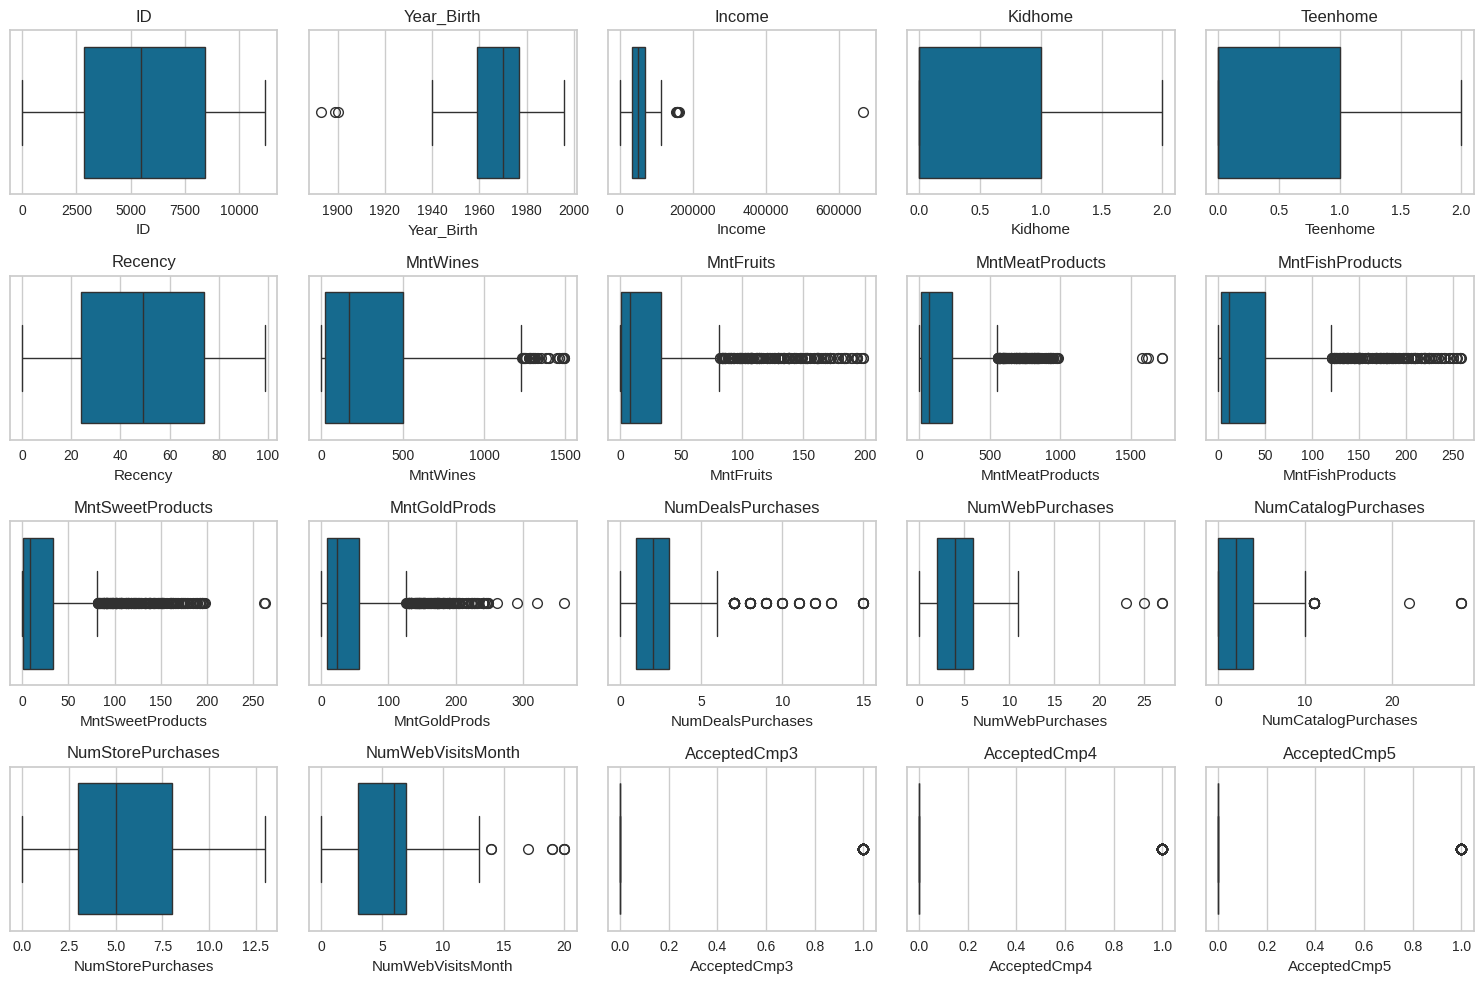

In [36]:
# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
df_numeric = data.select_dtypes(include=['int64', 'float64'])
max_plots = 20
for i, col in enumerate(df_numeric.columns[:max_plots], 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=data,x=col)
    plt.title(col)
plt.tight_layout()
plt.show()


##### **Observations:**

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

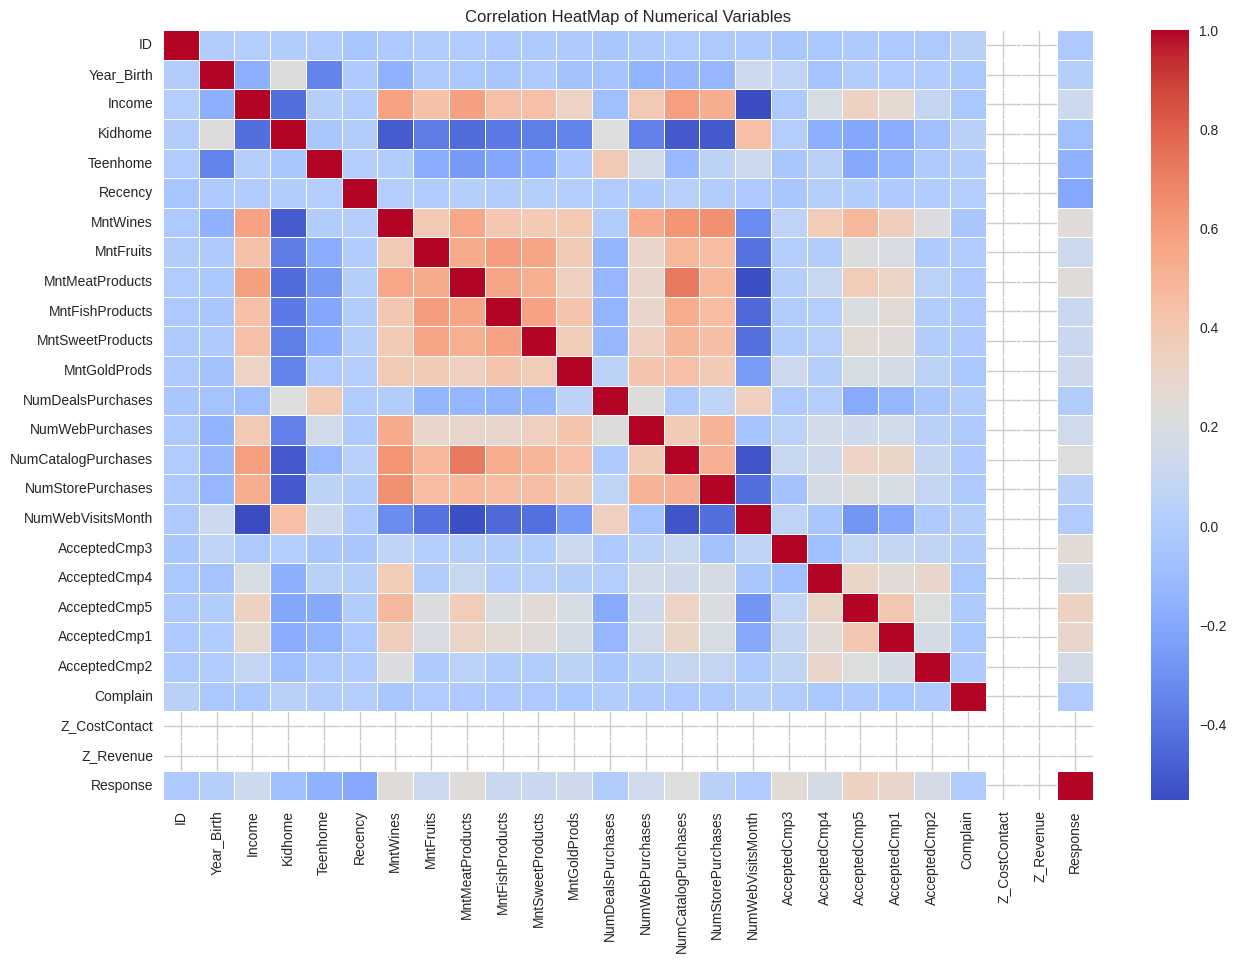

In [37]:
# Write your code here

corr_matrix=data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix,annot=False,cmap="coolwarm",linewidths=0.5)

plt.title("Correlation HeatMap of Numerical Variables")

plt.show()

##### **Observations:**

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

Number of Clusters: 1 	WCSS: 51519.99999999996
Number of Clusters: 2 	WCSS: 40153.47579447755
Number of Clusters: 3 	WCSS: 36575.08180479219
Number of Clusters: 4 	WCSS: 34020.57392437236
Number of Clusters: 5 	WCSS: 32023.376797601246
Number of Clusters: 6 	WCSS: 30564.92877504837
Number of Clusters: 7 	WCSS: 28513.664629665567
Number of Clusters: 8 	WCSS: 27563.722916187784
Number of Clusters: 9 	WCSS: 26072.09760806629
Number of Clusters: 10 	WCSS: 25480.0666415101


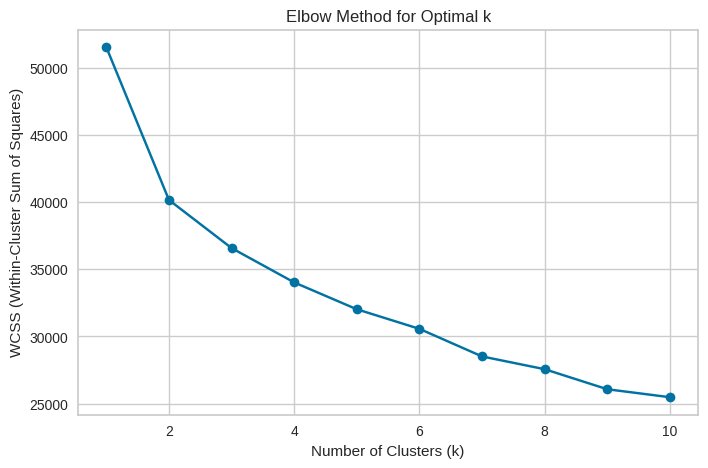

In [38]:
# Write your code here

from sklearn.preprocessing import StandardScaler

numerical_cols=data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove("ID")

# Handle missing values by filling with the mean

data[numerical_cols]=data[numerical_cols].fillna(data[numerical_cols].mean())

# Standardize the numerical features

scaler = StandardScaler()
scaled_data=scaler.fit_transform(data[numerical_cols])

# Determine WCSS for different cluster numbers

wcss=[]

k_range=range(1,11)

for k in k_range:
  k_means=KMeans(n_clusters=k,random_state=42,n_init=10)
  k_means.fit(scaled_data)
  #wcss.append(k_means.inertia_)
  wcss2 = k_means.inertia_
  wcss.append(wcss2)

  print("Number of Clusters:", k, "\tWCSS:",wcss2)


# Plot the elbow method

plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

##### **Observations:**

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [39]:
# Write your code here

#silhoutte score
data=data.dropna()

numerical_cols=data.select_dtypes(include=['number']).columns
df_numeric=data[numerical_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

silhouette_scores=[]
k_range=range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(k, score))
# Find the optimal number of clusters (highest silhouette score)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]

print(silhouette_scores, optimal_k)




For n_clusters = 2, the silhouette score is 0.2532170711223931)
For n_clusters = 3, the silhouette score is 0.17614120667734864)
For n_clusters = 4, the silhouette score is 0.17985246915340528)
For n_clusters = 5, the silhouette score is 0.1812382940426707)
For n_clusters = 6, the silhouette score is 0.16985901425166997)
For n_clusters = 7, the silhouette score is 0.12013773145487668)
For n_clusters = 8, the silhouette score is 0.14265825097893753)
For n_clusters = 9, the silhouette score is 0.12190881041075902)
For n_clusters = 10, the silhouette score is 0.12434949038491219)
[np.float64(0.2532170711223931), np.float64(0.17614120667734864), np.float64(0.17985246915340528), np.float64(0.1812382940426707), np.float64(0.16985901425166997), np.float64(0.12013773145487668), np.float64(0.14265825097893753), np.float64(0.12190881041075902), np.float64(0.12434949038491219)] 2


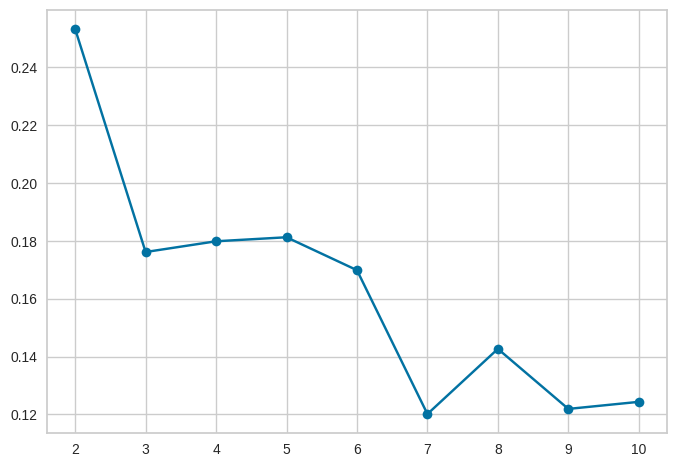

In [40]:
plt.plot(k_range,silhouette_scores,marker = 'o')
plt.show()

##### **Observations:**

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [41]:
# Write your code here

import time

optimal_k = 4

# Fit the final KMeans model and measure the time taken
start_time = time.time()

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(df_scaled)

end_time = time.time()
total_time = end_time - start_time

# Output the total fitting time
total_time

0.04625654220581055

##### **Observations:**

## **Hierarchical Clustering**

#### **Question 10**: Calculate the cophnetic correlation for every combination of distance metrics and linkage. Which combination has the highest cophnetic correlation?

In [42]:
# list of linkage methods
numerical_df=data.select_dtypes(include=[np.number]).dropna()

distance_metrics=['euclidean','cityblock','cosine','correlation']
linkage_methods = ["single", "complete", "average", "weighted"]

largest_cophenet_corr = 0
largest_dm_lm = [0, 0]

for metric in distance_metrics:
    for method in linkage_methods:
        linkage_matrix = linkage(numerical_df, metric=metric, method=method) # Calculating the linkage with the distance metrics and linkage method.
        cd, coph_dists = cophenet(linkage_matrix, pdist(numerical_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                metric.capitalize(), method, cd
            )
        )
        if largest_cophenet_corr < cd:
            largest_cophenet_corr = cd
            largest_dm_lm[0] = metric
            largest_dm_lm[1] = method
            # printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Largest cophenetic correlation is {}, which is obtained with {} distance and {} linkage."
    .format(largest_cophenet_corr, largest_dm_lm[0].capitalize(), largest_dm_lm[1])
)

Cophenetic correlation for Euclidean distance and single linkage is 0.7490312033413058.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6193295466555993.
Cophenetic correlation for Euclidean distance and average linkage is 0.8801835450540024.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6747742536024502.
Cophenetic correlation for Cityblock distance and single linkage is 0.7528618734701636.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7295545507803565.
Cophenetic correlation for Cityblock distance and average linkage is 0.8789745034979575.
Cophenetic correlation for Cityblock distance and weighted linkage is 0.7746449097809549.
Cophenetic correlation for Cosine distance and single linkage is 0.08137458173381541.
Cophenetic correlation for Cosine distance and complete linkage is 0.19034828651497693.
Cophenetic correlation for Cosine distance and average linkage is 0.15897486591882135.
Cophenetic correlation fo

##### **Observations:**

 **Question 11**: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?

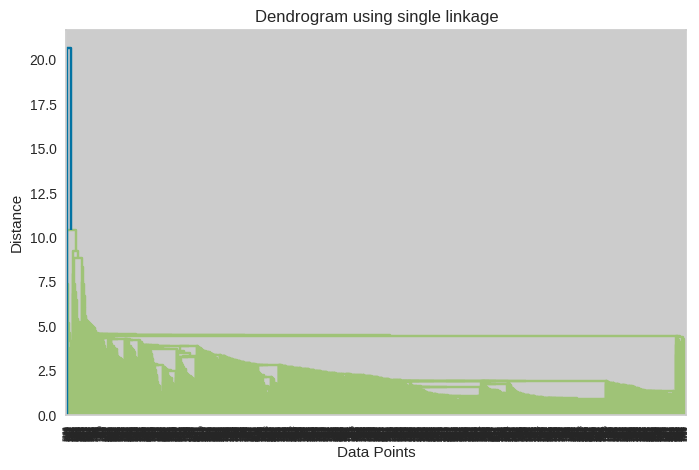

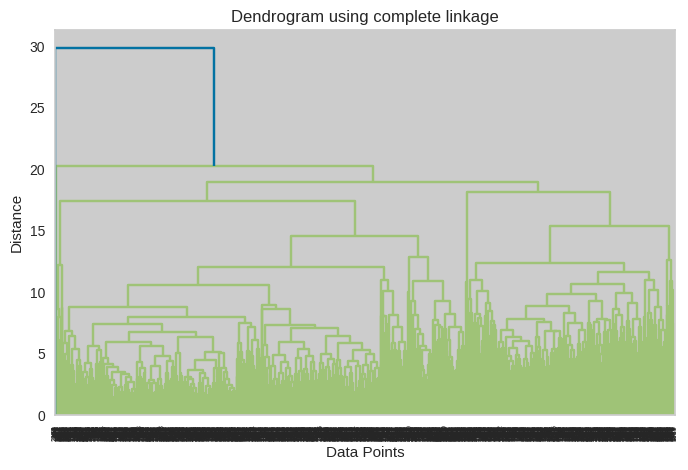

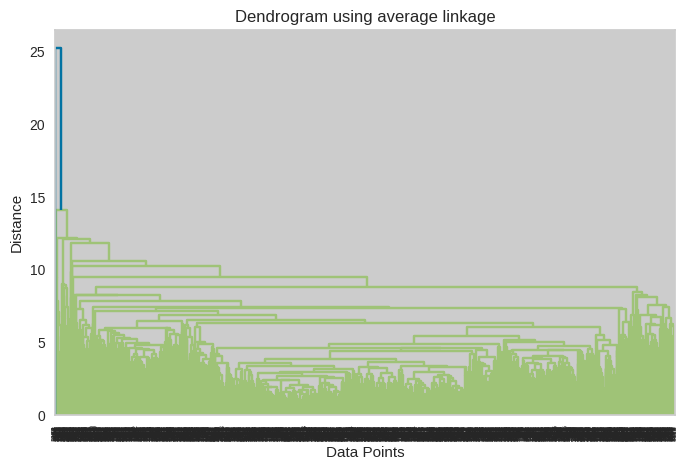

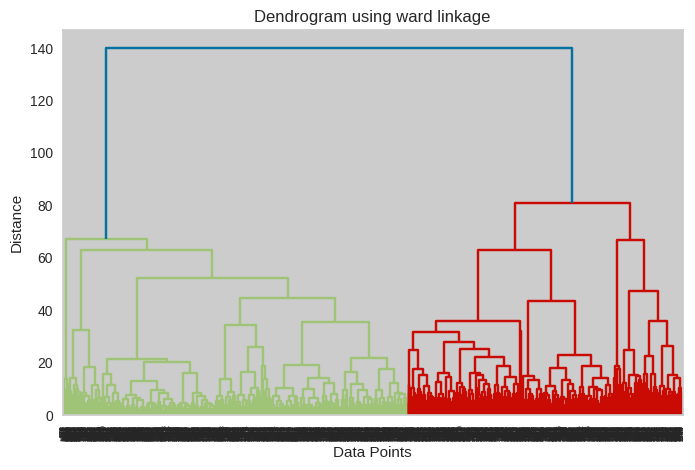

In [43]:
# Write your code here
import scipy.cluster.hierarchy as sch

df_numeric = data.select_dtypes(include=['number']).dropna()

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

linkage_methods = ['single', 'complete', 'average', 'ward']

# Plot dendrograms
for method in linkage_methods:
    plt.figure(figsize=(8, 5))
    linkage_matrix = sch.linkage(data_scaled, method=method, metric="euclidean")
    sch.dendrogram(linkage_matrix)
    plt.title(f"Dendrogram using {method} linkage")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()


##### **Observations:**

#### **Question 12:** Check the silhoutte score for the hierchial clustering. What should be the appropriate number of clusters according to this plot?

In [17]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


For n_clusters = 2, silhouette score is 0.21123833296375513
For n_clusters = 3, silhouette score is 0.19192664391999967
For n_clusters = 4, silhouette score is 0.20176352122354696
For n_clusters = 5, silhouette score is 0.21070970107328682
For n_clusters = 6, silhouette score is 0.20995015294045005
For n_clusters = 7, silhouette score is 0.18464592084365147
For n_clusters = 8, silhouette score is 0.09352798652840015
For n_clusters = 9, silhouette score is 0.09978302205718168


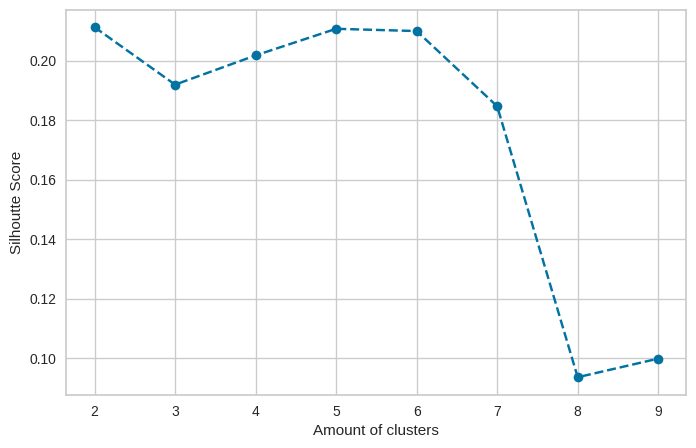

Optimal number of clusters: 2


In [45]:
# Write your code here

silhouette_scores=[]
cluster_range=range(2,10)

for clusters in cluster_range:
  labels=fcluster(linkage_matrix,clusters,criterion="maxclust")
  score=silhouette_score(df_scaled,labels)
  silhouette_scores.append(score)
  print("For n_clusters = {}, silhouette score is {}".format(clusters, score))
plt.figure(figsize=(8,5))
plt.plot(cluster_range,silhouette_scores, marker='o',linestyle='dashed')
plt.xlabel('Amount of clusters')
plt.ylabel('Silhoutte Score')
plt.show()
# Best number of clusters based on highest silhouette score
optimal_clusters=cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")






##### **Observations:**

#### **Question 13**: Fit the Hierarchial clustering model with the appropriate parameters finalized above. How much time does it take to fit the model?

In [ ]:
from sklearn.metrics import silhouette_score


In [46]:
# Write your code here
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_numeric)

start_time=time.time()
linkage_matrix=linkage(df_scaled,method='ward')
end_time=time.time()

execution_time=end_time-start_time

print(f"Time taken to fit the Hierarchical Clustering model: {execution_time:.4f} seconds")

optimal_clusters=4
labels=fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

silhouette=silhouette_score(df_scaled,labels)
print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette:.4f}")





Time taken to fit the Hierarchical Clustering model: 0.0790 seconds
Silhouette Score for 4 clusters: 0.2018


##### **Observations:**

## **Cluster Profiling and Comparison**

#### **Question 14**: Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions Which one of them provides better clustering?

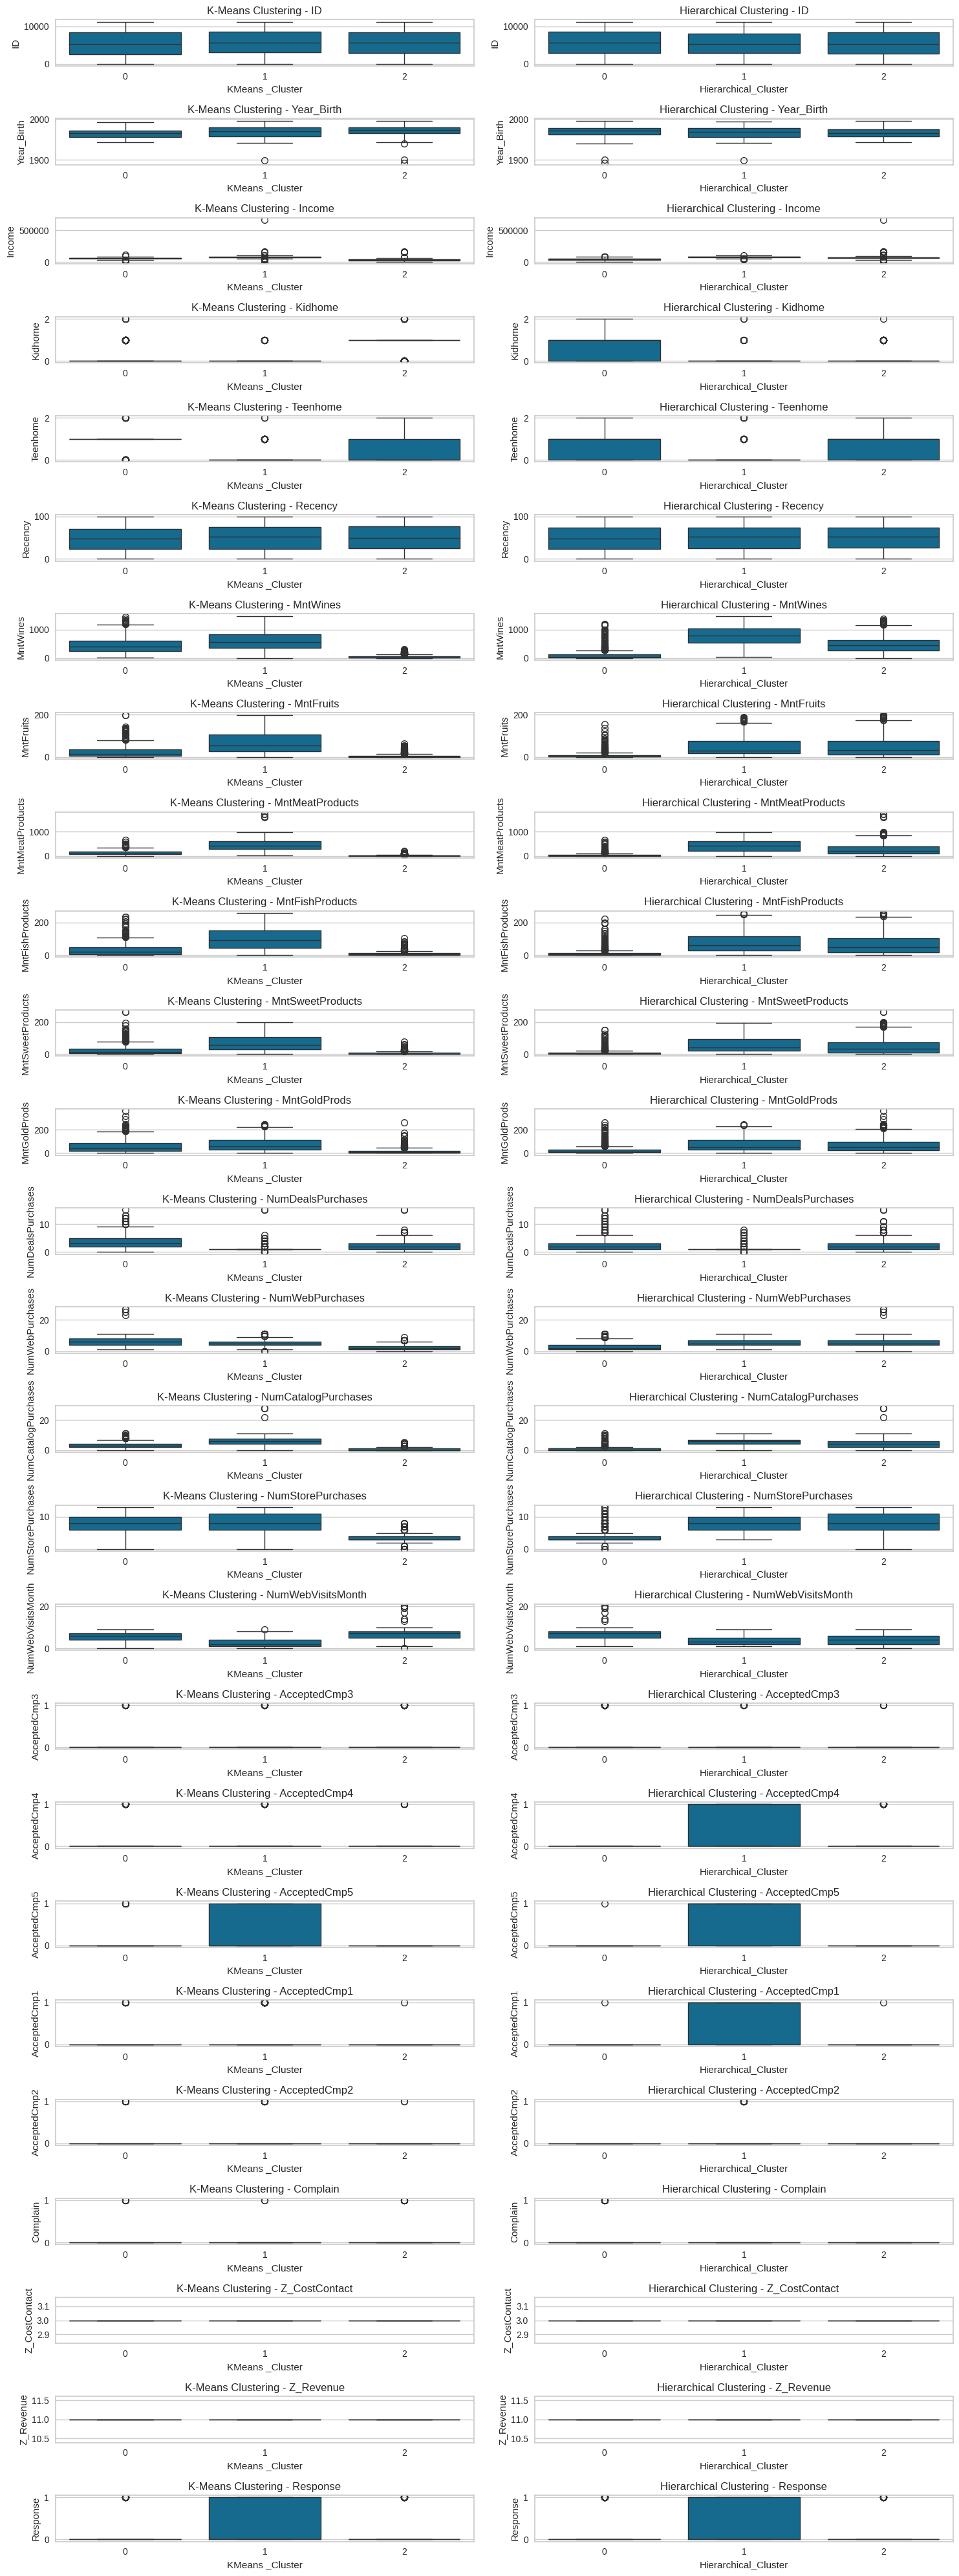

In [47]:
# Write your code here
num_clusters=3

k_means=KMeans(n_clusters=num_clusters,random_state=42,n_init=10)
data['KMeans _Cluster']=k_means.fit_predict(df_scaled)

hierarchical=AgglomerativeClustering(n_clusters=num_clusters)
data['Hierarchical_Cluster']=hierarchical.fit_predict(df_scaled)

fig,axes=plt.subplots(nrows=len(numerical_cols),ncols=2,figsize=(15,40))

#K-Means Boxplot
for i, col in enumerate(numerical_cols):
  sns.boxplot(x=data['KMeans _Cluster'],y=data[col],ax=axes[i,0])
  axes[i,0].set_title(f"K-Means Clustering - {col}")

# Hierarchical Clustering boxplot
  sns.boxplot(x=data['Hierarchical_Cluster'],y=data[col],ax=axes[i,1])
  axes[i,1].set_title(f"Hierarchical Clustering - {col}")

plt.tight_layout()

plt.show()


##### **Observations:**

#### **Question 15**: Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot. What observations can be derived for each cluster from this plot?

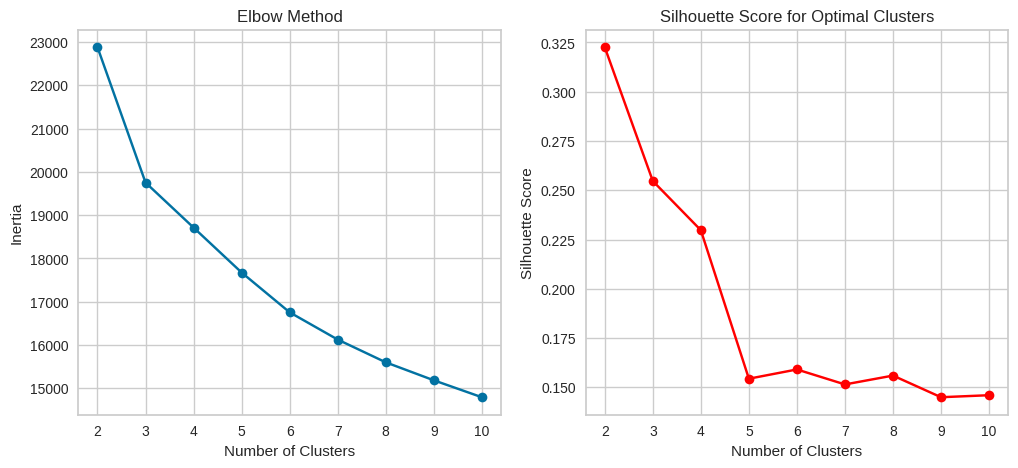

In [48]:
# Selecting relevant numerical features for clustering
features = [
    "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits",
    "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth"
]

df_selected = data[features].dropna()

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Determine optimal clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker="o", color="red")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal Clusters")

plt.show()

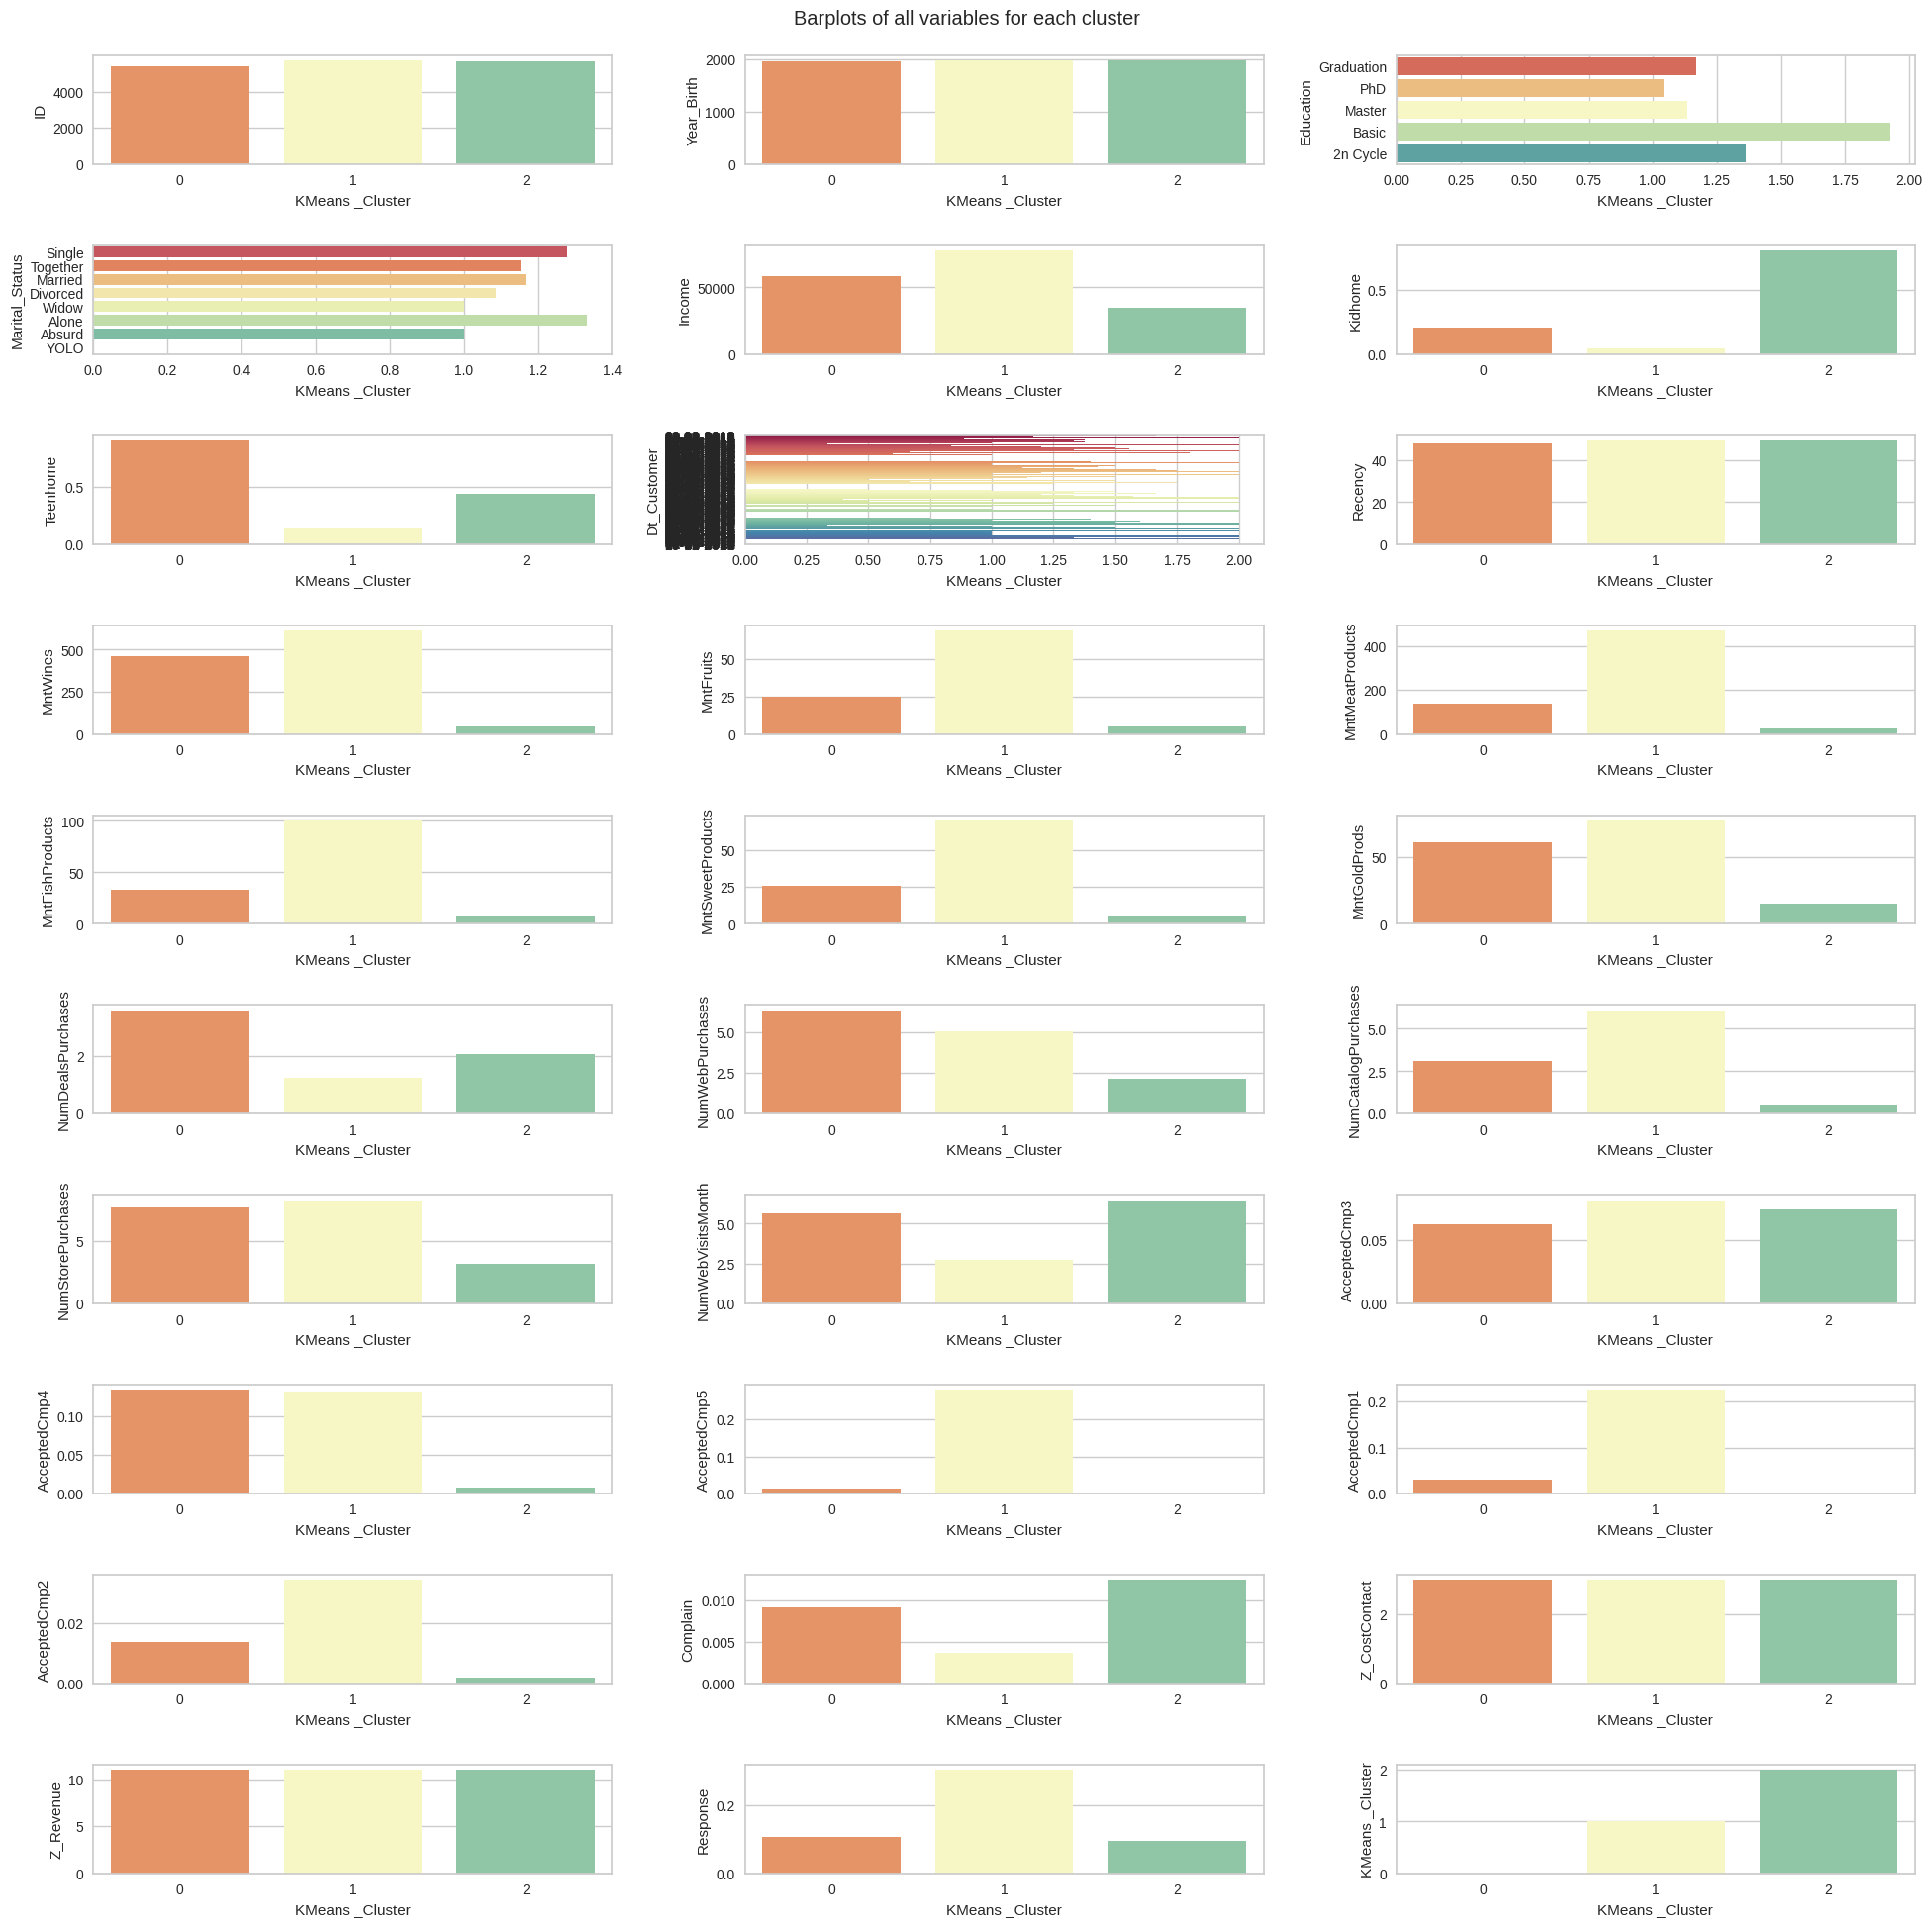

In [49]:
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot

# Assuming your cluster labels are stored in 'KMeans _Cluster' or 'Hierarchical_Cluster'
cluster_column = "KMeans _Cluster"  # or "Hierarchical_Cluster" if using hierarchical clustering

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(data.columns.to_list()[:-1]) / num_cols))  # Calculate rows dynamically

for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    sns.barplot(data=data, x=cluster_column, y=variable, palette='Spectral', errorbar=None)

plt.tight_layout(pad=2.0)

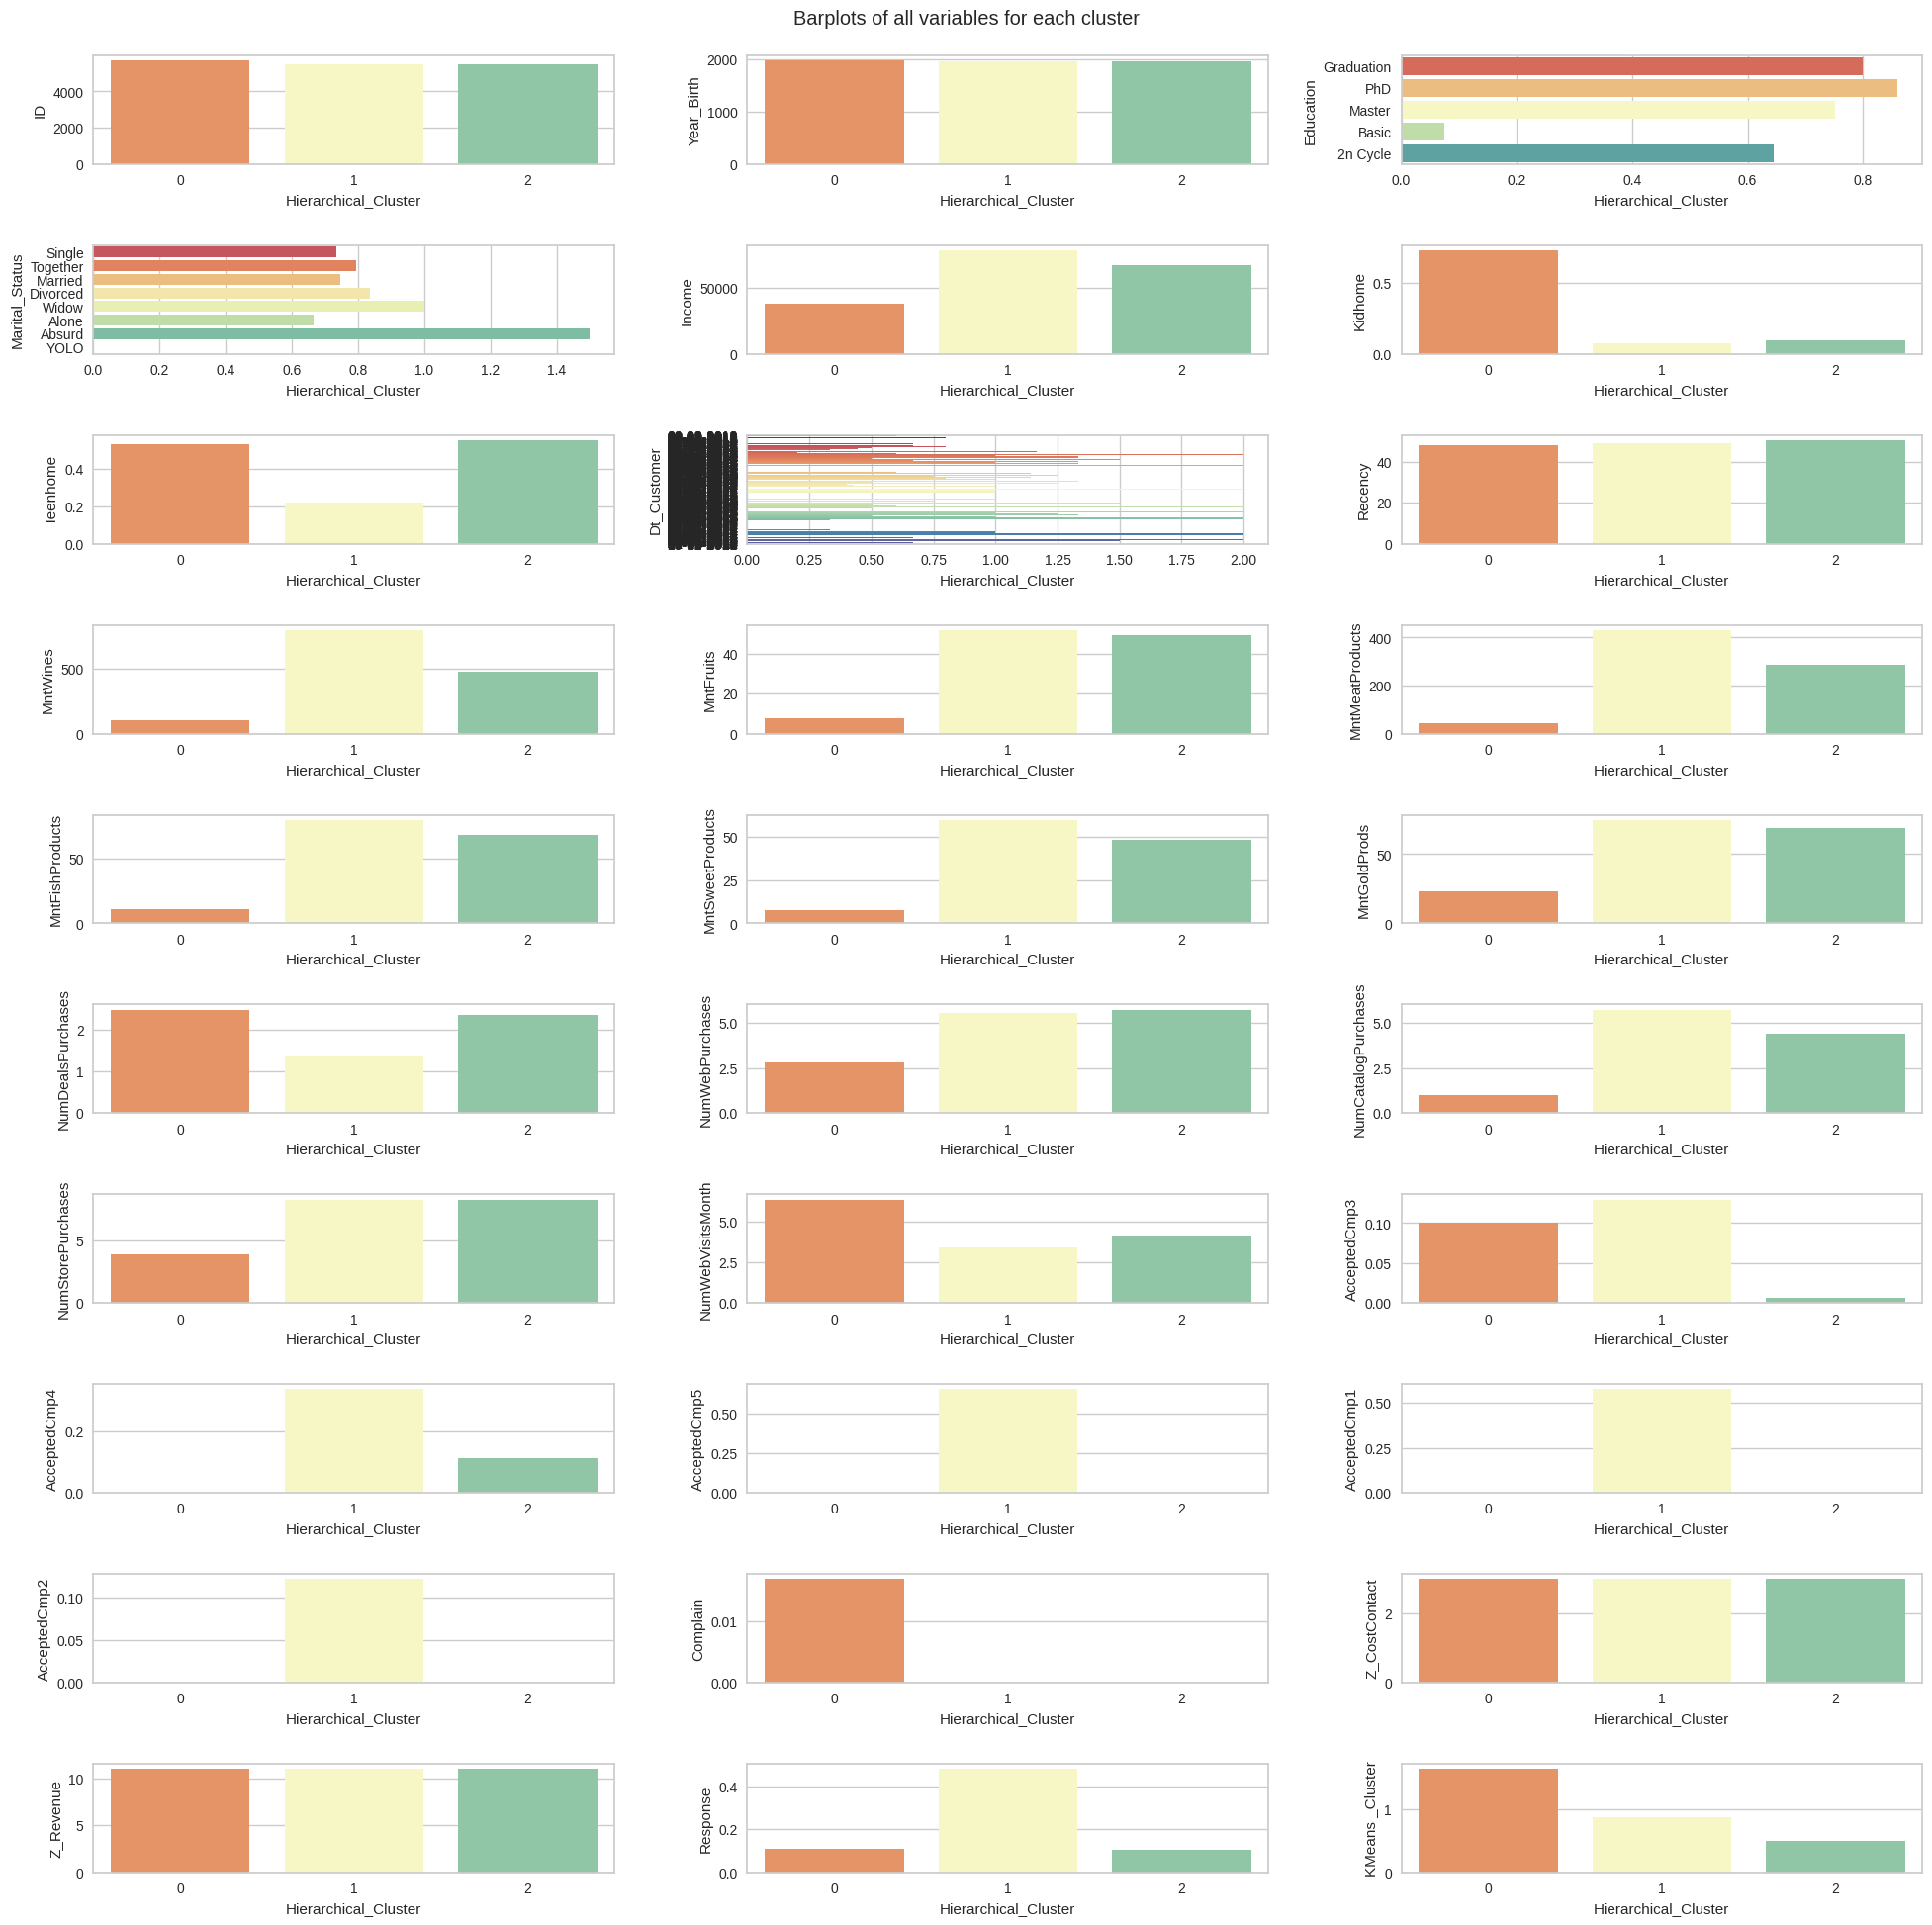

In [50]:
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot

# Assuming your cluster labels are stored in 'KMeans _Cluster' or 'Hierarchical_Cluster'
cluster_column = "Hierarchical_Cluster"  # or "Hierarchical_Cluster" if using hierarchical clustering

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(data.columns.to_list()[:-1]) / num_cols))  # Calculate rows dynamically

for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    sns.barplot(data=data, x=cluster_column, y=variable, palette='Spectral', errorbar=None)

plt.tight_layout(pad=2.0)

##### **Observations:**

## **Business Recommedations**


- We have seen that 3 clusters are distinctly formed using both methodologies and the clusters are analogous to each other.
- Cluster 1 has premium customers with a high credit limit and more credit cards, indicating that they have more purchasing power. The customers in this group have a preference for online banking.
- Cluster 0 has customers who prefer to visit the bank for their banking needs than doing business online or over the phone. They have an average credit limit and a moderate number of credit cards.
- Cluster 2 has more overhead of customers calling in, and the bank may need to spend money on call centers.


Here are **5–7 actionable business recommendations** based on the cluster profiling:

---

### **1. Focus on Retaining High-Value Customers (Cluster 3)**
- **Offer Exclusive Loyalty Programs**: Provide tailored loyalty benefits, early access to products, and exclusive discounts to maintain engagement and drive repeat purchases.
- **Upsell and Cross-Sell**: Introduce premium products or bundles targeting their high spending patterns across product categories like wines, gold products, and meats.
- **Personalized Campaigns**: Use their high response rate to create personalized campaigns highlighting products they prefer.

---

### **2. Activate Potential in Moderate-Spending Customers (Cluster 2)**
- **Incentivize Higher Engagement**: Offer targeted discounts or special offers to encourage increased spending and purchases across channels.
- **Educate About Products**: Provide content (emails, guides, or social media) showcasing the value and uniqueness of products they don’t purchase frequently.
- **Improve Campaign Effectiveness**: Refine campaign messaging based on their moderate response rate to increase acceptance.

---

### **3. Reengage Low-Value Customers (Cluster 1)**
- **Win-Back Campaigns**: Implement campaigns specifically aimed at bringing back inactive customers, such as offering steep discounts or limited-time offers.
- **Understand Barriers to Engagement**: Conduct surveys or collect feedback to identify reasons for their low purchases and disengagement.
- **Promote Entry-Level Products**: Introduce affordable or trial-sized products to ease them into higher spending.

---

### **4. Convert Browsers into Buyers (Cluster 0)**
- **Optimize Website Experience**: Since Cluster 0 has high website visits but low spending, improve website navigation, showcase popular products, and streamline the checkout process.
- **Targeted Digital Campaigns**: Retarget these users with ads or emails featuring products they browsed but didn’t purchase.
- **Offer Online-Exclusive Discounts**: Provide web-only discounts or promotions to convert visits into purchases.

---

### **5. Strengthen Digital and Multi-Channel Strategies**
- **Seamless Omni-Channel Experience**: Ensure a consistent shopping experience across all channels (web, catalog, and store) to encourage cross-channel engagement, especially for Clusters 2 and 3.
- **Digital Campaigns for All Clusters**: Focus on targeted digital campaigns, particularly for Clusters 0 and 2, as they have moderate to high online engagement.

---

### **6. Develop Campaigns to Boost Responses**
- Use the insights from Clusters 2 and 3 (which show higher response rates) to refine campaign targeting and messaging. Emulate successful strategies used for Cluster 3 to increase responses across other segments.

---

### **7. Leverage Product-Specific Insights**
- Promote popular categories (e.g., wines, gold products) to high-value clusters, while running introductory campaigns for less-engaged clusters to familiarize them with premium products.

---

By focusing on these strategies, the company can enhance engagement, increase revenue, and strengthen customer loyalty across all clusters.